Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
from glob import glob
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img
import os
import cv2
from tqdm import tqdm
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
from tensorflow.keras.preprocessing.image import ImageDataGenerator

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [4]:
DATADIR = "flowers/"
CATEGORIES = [f.split('/')[-1] for f in glob('flowers/*')] # flower categories
CATEGORIES

['sunflower', 'tulip', 'rose', 'dandelion', 'daisy']

In [5]:
IMG_SIZE = 128
training_data = []
def create_training_data():
    for category in CATEGORIES:  # flowers

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # 'sunflower=0', 'tulip=1', 'rose=2', 'dandelion=3', 'daisy=4' 

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))


100%|██████████| 769/769 [00:01<00:00, 697.48it/s]

4323


In [6]:
import random
random.shuffle(training_data)

In [7]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 3))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

[[[[  0   0   0]
   [  0   0   0]
   [  1   1   1]
   ...
   [  1   1   1]
   [  1   1   1]
   [  1   1   1]]

  [[  0   0   0]
   [  0   0   0]
   [  1   1   1]
   ...
   [  1   1   1]
   [  1   1   1]
   [  1   1   1]]

  [[  0   0   0]
   [  0   0   0]
   [  1   1   1]
   ...
   [  1   1   1]
   [  1   1   1]
   [  1   1   1]]

  ...

  [[ 26  66 101]
   [ 28  81 126]
   [ 27  91 138]
   ...
   [  1   1   1]
   [  0   1   1]
   [  0   0   0]]

  [[  4   5   6]
   [  2   2   4]
   [  0   4   3]
   ...
   [  0   1   1]
   [  0   1   1]
   [  0   0   0]]

  [[ 23  43  61]
   [  1   3   1]
   [  2   4   2]
   ...
   [  0   1   1]
   [  0   1   1]
   [  0   0   0]]]]


In [8]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close() #We can always load it in to our current script, or a totally new one by doing:




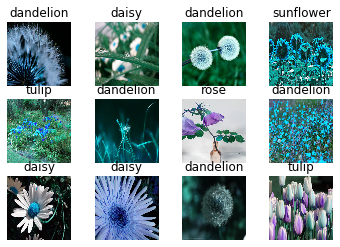

In [9]:
pickle_in = open("X.pickle","rb")
flower_images = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
flower_labels = pickle.load(pickle_in)
#lets check images from X.pickle and labels from y.pickle
for i in range(12):
    ax = plt.subplot(3,4, i + 1)
    plt.imshow(array_to_img(flower_images[i]))
    plt.title(CATEGORIES[flower_labels[i]])
    plt.axis("off")

In [10]:
flower_images.shape

(4323, 128, 128, 3)

In [11]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(flower_images, np.array(flower_labels), test_size=0.4, random_state=101)

In [12]:

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
print('train data ',X_train.shape, y_train.shape)
print('test data ',X_test.shape, y_test.shape)

train data  (2593, 128, 128, 3) (2593, 5)
test data  (1730, 128, 128, 3) (1730, 5)


In [13]:
#normalizing X data pixels
X_train = X_train/255.0
X_test = X_test/255.0

In [14]:
# define CNN model
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import regularizers
cnn = models.Sequential()

cnn.add(layers.Conv2D(64, (3,3), activation='relu', input_shape = X_train.shape[1:]))
cnn.add(layers.MaxPooling2D((2, 2)))

cnn.add(layers.Conv2D(64, (3,3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))

cnn.add(layers.Conv2D(96, (3,3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))

cnn.add(layers.Conv2D(128, (3,3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))



cnn.add(layers.Dense(512, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
cnn.add(layers.Dropout(0.5))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(5, activation='softmax'))

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 96)        55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       1

<h3>Data Augmentation to avoid model overfitting</h3>

In [25]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, -10 to 10)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(X_train)


In [ ]:
cnn_history = cnn.fit(datagen.flow(X_train,y_train,batch_size=64),
                              epochs= 150, validation_data=(X_test,y_test),
                              steps_per_epoch=X_train.shape[0] // 64)

<h3><b>The best model has already been trained and saved having accuracy > 85%</b></h3>

In [15]:
cnn = tf.keras.models.load_model('cnn_model_augmented_acc_90p.h5')
cnn.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 61, 61, 64)        36928     
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 28, 28, 96)        55392     
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 14, 14, 96)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 12, 12, 128)     

In [16]:
_, acc = cnn.evaluate(X_test, y_test)
acc = np.ceil((acc*100))
print(f'Test Accuracy = {acc}')

55/55 [==============================] - 7s 117ms/step - loss: 0.4910 - accuracy: 0.8855
Test Accuracy = 89.0


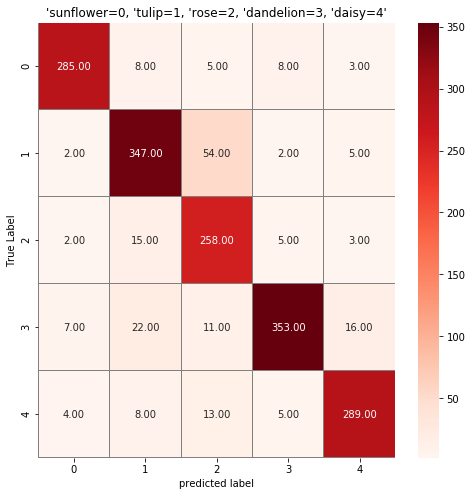

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
Y_pred = cnn.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1)
confusion_mtx = confusion_matrix(Y_true,Y_pred_classes)
f,ax = plt.subplots(figsize = (8,8))
sns.heatmap(confusion_mtx,annot=True,linewidths = 0.01,cmap="Reds",
            linecolor = "gray",fmt = ".2f",ax=ax
            )
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("'sunflower=0, 'tulip=1, 'rose=2, 'dandelion=3, 'daisy=4'")
plt.show()

<h3><b>Let us predict some flowers</b></h3>

This flower most likely belongs to tulip with a 100.00% confidence.


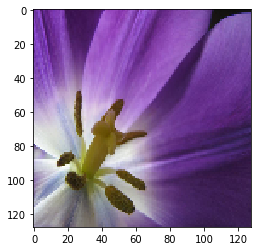

In [21]:
def predict_flowers(path):
    img = load_img(path, target_size=(128, 128))
    plt.imshow(img)
    img_array = img_to_array(img)
    # Add the image to a batch where it's the only member.
    img = (np.expand_dims(img_array,0))
    y_pred=cnn.predict(img)
    score = y_pred.max()
    flower_name = CATEGORIES[np.argmax(y_pred)]
    score
    print("This flower most likely belongs to {} with a {:.2f}% confidence.".format(flower_name, 100 * score))
predict_flowers('flowers/tulip/112334842_3ecf7585dd.jpg')

This flower most likely belongs to daisy with a 100.00% confidence.


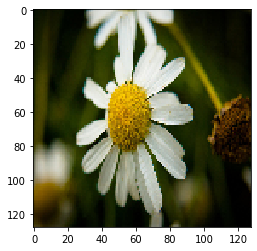

In [22]:
predict_flowers('flowers/daisy/10437929963_bc13eebe0c.jpg')

172032/165862 [===============================] - 0s 2us/step
This flower most likely belongs to sunflower with a 100.00% confidence.


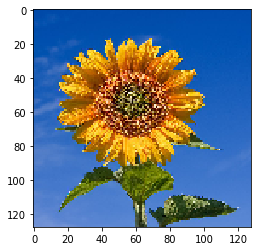

In [29]:
sunflower_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/4/40/Sunflower_sky_backdrop.jpg/800px-Sunflower_sky_backdrop.jpg"
sunflower_path = tf.keras.utils.get_file('sunflower', origin=sunflower_url)
predict_flowers(sunflower_path)

This flower most likely belongs to rose with a 100.00% confidence.


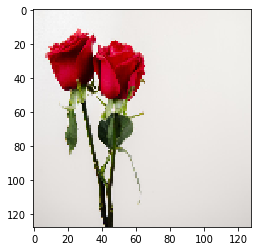

In [26]:

flower_url = 'https://image.freepik.com/free-photo/side-view-red-color-roses-isolated-white-background-with-copy-space_141793-8627.jpg'
path = tf.keras.utils.get_file('flower3', origin=flower_url)
predict_flowers(path)